<a href="https://www.kaggle.com/code/karan842/pandas-101?scriptVersionId=125620030" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pandas revision - 101
- This notebook contains Pandas revision

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Method Chaining

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/cajjster/data_files/main/vgsales.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
df['Genre'].value_counts().sort_index()

Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: Genre, dtype: int64

<AxesSubplot:>

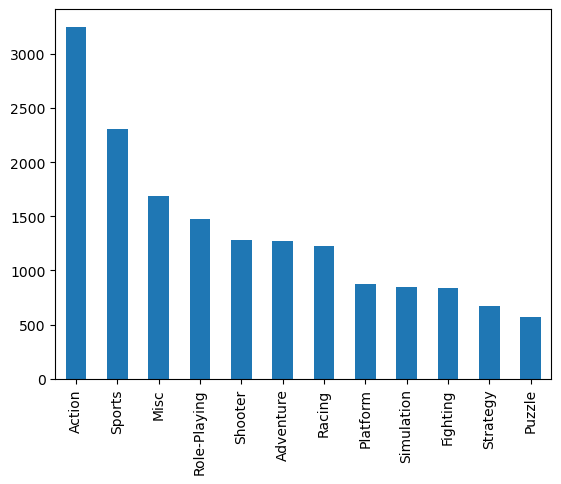

In [27]:
df['Genre'].sort_index().value_counts().plot.bar()

## `loc` and `iloc`

In [28]:
type(df.iloc[4])

pandas.core.series.Series

- Interger location

In [29]:
df.iloc[4:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [30]:
df.iloc[1:10:3] # start:stop:step

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [31]:
df.iloc[-1:]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
16290,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01


In [32]:
df.iloc[-1:,2:5] # r,c

,Year,Genre,Publisher
16290,2003,Platform,Wanadoo


- Column name based 

In [33]:
df.loc[:100,'NA_Sales']

0      41.49
1      29.08
2      15.85
3      15.75
4      11.27
       ...  
96      5.39
97      3.24
98      4.79
99      4.46
100     3.83
Name: NA_Sales, Length: 101, dtype: float64

In [34]:
df.loc[:100,['Platform','NA_Sales']]

,Platform,NA_Sales
0,Wii,41.49
1,NES,29.08
2,Wii,15.85
3,Wii,15.75
4,GB,11.27
...,...,...
96,NES,5.39
97,3DS,3.24
98,X360,4.79
99,X360,4.46


In [35]:
df.loc[100,"NA_Sales"] = 4.55

In [36]:
df.loc[100,"NA_Sales"] # change or update particular value

4.55

## Filter with conditional logic

In [37]:
for i in df[["Name","Platform","Year","Genre","Publisher"]]:
    print(i.upper())
    print(df[i].unique())
    print()

NAME
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']

PLATFORM
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

YEAR
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]

GENRE
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

PUBLISHER
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Int

In [38]:
wii = df['Platform'] == 'Wii'

In [39]:
wii.value_counts()

False    15001
True      1290
Name: Platform, dtype: int64

In [40]:
df.loc[wii]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...
16212,Teenage Mutant Ninja Turtles,Wii,2007,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16246,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16266,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16267,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


In [41]:
df.loc[df['Platform']=='PS2']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...
16252,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16254,Kanokon: Esuii,PS2,2008,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16265,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16273,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


## Video gammes those has higher number of sales in japan than EU

In [42]:
df.loc[df['JP_Sales'] > df['EU_Sales'],"Name"]

1                                        Super Mario Bros.
4                                 Pokemon Red/Pokemon Blue
5                                                   Tetris
12                             Pokemon Gold/Pokemon Silver
17                           Grand Theft Auto: San Andreas
                               ...                        
16268                                Neo Angelique Special
16273                                            Real Rode
16280                             Mezase!! Tsuri Master DS
16282    Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...
16283    Eiyuu Densetsu: Sora no Kiseki Material Collec...
Name: Name, Length: 4554, dtype: object

In [43]:
df.loc[(df['Platform']=="Wii") & (df['Genre']=='Role-Playing')]\
.sort_values(by='Global Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
709,Monster Hunter Tri,Wii,2009,Role-Playing,Nintendo,0.67,0.41,1.05,0.11,2.25
1127,Pokemon Battle Revolution,Wii,2006,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61
2083,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.49,0.26,0.16,0.08,0.98
2126,Dragon Quest X,Wii,2012,Role-Playing,Square Enix,0.00,0.00,0.96,0.00,0.96
2818,Dragon Quest Swords: The Masked Queen and the ...,Wii,2007,Role-Playing,Square Enix,0.18,0.01,0.50,0.02,0.71
2934,The Last Story,Wii,2011,Role-Playing,Nintendo,0.32,0.13,0.18,0.04,0.68
3234,Muramasa: The Demon Blade,Wii,2009,Role-Playing,Rising Star Games,0.33,0.13,0.11,0.04,0.61
3698,Tales of Symphonia: Dawn of the New World,Wii,2008,Role-Playing,Namco Bandai Games,0.22,0.05,0.24,0.03,0.54
4110,Dragon Quest 25 Shuunen Kinin: Famicom & Super...,Wii,2011,Role-Playing,Square Enix,0.00,0.00,0.47,0.00,0.47
4679,Marvel: Ultimate Alliance,Wii,2006,Role-Playing,Activision,0.37,0.01,0.00,0.03,0.41


In [44]:
## Alternate wway for above technique
rpg = df['Genre'] == 'Role-Playing'
df.loc[wii & rpg].reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Monster Hunter Tri,Wii,2009,Role-Playing,Nintendo,0.67,0.41,1.05,0.11,2.25
1,Pokemon Battle Revolution,Wii,2006,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61
2,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.49,0.26,0.16,0.08,0.98
3,Dragon Quest X,Wii,2012,Role-Playing,Square Enix,0.00,0.00,0.96,0.00,0.96
4,Dragon Quest Swords: The Masked Queen and the ...,Wii,2007,Role-Playing,Square Enix,0.18,0.01,0.50,0.02,0.71
5,The Last Story,Wii,2011,Role-Playing,Nintendo,0.32,0.13,0.18,0.04,0.68
6,Muramasa: The Demon Blade,Wii,2009,Role-Playing,Rising Star Games,0.33,0.13,0.11,0.04,0.61
7,Tales of Symphonia: Dawn of the New World,Wii,2008,Role-Playing,Namco Bandai Games,0.22,0.05,0.24,0.03,0.54
8,Dragon Quest 25 Shuunen Kinin: Famicom & Super...,Wii,2011,Role-Playing,Square Enix,0.00,0.00,0.47,0.00,0.47
9,Marvel: Ultimate Alliance,Wii,2006,Role-Playing,Activision,0.37,0.01,0.00,0.03,0.41


In [45]:
## Filter with OR
action = df['Genre'] == "Action"
shooter = df['Genre'] == "Shooter"

df.loc[action | shooter]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
...,...,...,...,...,...,...,...,...,...,...
16275,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.00,0.00,0.01
16276,Carmageddon 64,N64,1999,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
16278,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16282,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [46]:
# filter with both or and condition

since_2010 = df['Year'] == 2010
df.loc[(since_2010) & (action | shooter)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
40,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
62,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88
123,Red Dead Redemption,PS3,2010,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,6.60
134,Red Dead Redemption,X360,2010,Action,Take-Two Interactive,3.70,1.97,0.09,0.57,6.34
...,...,...,...,...,...,...,...,...,...,...
15486,Metal Fight Beyblade: Choujou Kessen! Big Bang...,DS,2010,Action,Hudson Soft,0.00,0.00,0.02,0.00,0.02
15506,Dark Void,PC,2010,Action,Capcom,0.00,0.01,0.00,0.00,0.02
15583,Shin Sangoku Musou Online: Souten Ranbu,PS3,2010,Action,Tecmo Koei,0.00,0.00,0.02,0.00,0.02
15866,Monkey Madness: Island Escape,DS,2010,Action,Storm City Games,0.01,0.00,0.00,0.00,0.01


In [47]:
# not using () will give you different outputs

df.loc[since_2010 & action | shooter]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
...,...,...,...,...,...,...,...,...,...,...
16196,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16262,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16270,Damnation,PC,2009,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16278,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


#### isin()

In [48]:
top_3_pub = df['Publisher'].value_counts()[:3].index.tolist()

In [49]:
top_3_pub_isin = df.Publisher.isin(top_3_pub)
top_3_pub_df = df.loc[top_3_pub_isin]
top_3_pub_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...
16234,Spore Galactic Adventures,PC,2009,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16244,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16247,Psychic Detective,PS,1995,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01
16260,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [50]:
genres = df.Genre.isin(['Sports','Action','Shooter'])
sales_2M = df['Global Sales'] >=2

In [51]:
df.loc[genres & sales_2M]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
...,...,...,...,...,...,...,...,...,...,...
830,Dead Space,PS3,2008,Action,Electronic Arts,1.05,0.67,0.00,0.30,2.02
831,Call of Duty 2,X360,2005,Shooter,Activision,1.81,0.05,0.01,0.15,2.02
832,Madden NFL 15,X360,2014,Sports,Electronic Arts,1.76,0.09,0.00,0.17,2.02
835,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01


In [52]:
df.loc[genres & top_3_pub_isin & sales_2M]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...
826,Madden NFL 15,PS4,2014,Sports,Electronic Arts,1.53,0.25,0.00,0.25,2.03
829,NBA Live 2004,PS2,2003,Sports,Electronic Arts,1.57,0.18,0.00,0.27,2.03
830,Dead Space,PS3,2008,Action,Electronic Arts,1.05,0.67,0.00,0.30,2.02
831,Call of Duty 2,X360,2005,Shooter,Activision,1.81,0.05,0.01,0.15,2.02


In [53]:
## Between() allows us to specify a range'
between_2m_10_m = df['Global Sales'].between(2,10)

y_90 = df['Year'].between(1990,1999)
y_00 = df['Year'].between(2000,2010)
y_10 = df['Year'].between(2010,2019)

<AxesSubplot:>

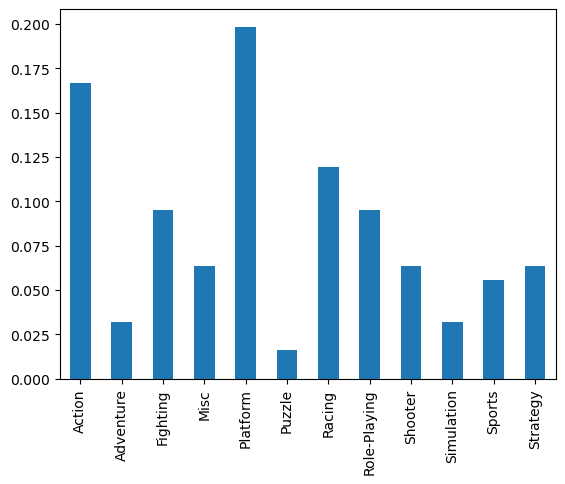

In [54]:
df.loc[between_2m_10_m & y_90,"Genre"].value_counts(normalize=True).sort_index().plot.bar()

In [55]:
df.loc[between_2m_10_m & y_00,"Genre"].value_counts(normalize=True)

Action          0.205950
Sports          0.144165
Role-Playing    0.116705
Misc            0.107551
Shooter         0.105263
Platform        0.086957
Racing          0.077803
Fighting        0.054920
Simulation      0.050343
Puzzle          0.029748
Adventure       0.011442
Strategy        0.009153
Name: Genre, dtype: float64

<AxesSubplot:>

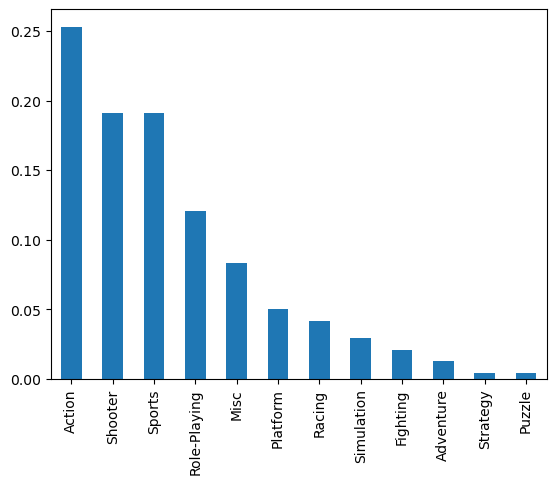

In [56]:
df.loc[between_2m_10_m & y_10,"Genre"].value_counts(normalize=True).plot.bar()

In [57]:
## Leta find out which Racing games has the highest sales in EU compared to the NA.JP and Other Sales
# between 2000 & 2010

In [58]:
race = df['Genre'] == 'Racing'
highest_EU = (df['EU_Sales'] > df['JP_Sales']) & (df['EU_Sales'] > df['NA_Sales']) &  (df['EU_Sales'] > df['Other_Sales'])
y_00s = df["Year"].between(2000,2019)

In [59]:
df.loc[race & highest_EU & y_00s,["Name","EU_Sales"]].sort_values(by='EU_Sales',ascending=False).head().set_index("Name")

,EU_Sales
Name,
Gran Turismo 5,4.88
Need for Speed Underground 2,3.02
The Simpsons: Hit & Run,2.19
Gran Turismo 5 Prologue,1.83
Gran Turismo 6,1.80


## Most useful methods for data analysis

In [60]:
df.query("NA_Sales < JP_Sales")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
41,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
66,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
73,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
...,...,...,...,...,...,...,...,...,...,...
16268,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16273,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16280,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16282,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [61]:
df.query("Publisher == 'Ubisoft' and Year > 2014")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
350,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
407,Assassin's Creed Syndicate,PS4,2015,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28
749,Tom Clancy's Rainbow Six: Siege,PS4,2015,Shooter,Ubisoft,0.54,1.16,0.13,0.32,2.15
761,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
835,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
1515,Tom Clancy's Rainbow Six: Siege,XOne,2015,Shooter,Ubisoft,0.73,0.44,0.00,0.12,1.29
1527,Assassin's Creed Syndicate,XOne,2015,Action,Ubisoft,0.61,0.56,0.00,0.11,1.28
1651,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20
2400,Far Cry: Primal,XOne,2016,Action,Ubisoft,0.46,0.32,0.00,0.07,0.85
3391,Just Dance 2016,WiiU,2015,Misc,Ubisoft,0.28,0.25,0.00,0.05,0.58


In [62]:
ps3 = df.query("Platform == 'PS3'")

In [63]:
# unique and nunique()

df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [64]:
df.nunique()

Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global Sales      621
dtype: int64

In [65]:
df['Year'].nunique()

39

In [66]:
# for i in df.select_dtypes("object"):
#     print(df[i].unique())

In [67]:
ps3.reset_index(drop=True,inplace=True)

In [68]:
ps3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
2,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
3,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
4,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...
1299,Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
1300,Shin Koihime Musou: Otome Taisen * Sangokushi ...,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
1301,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
1302,Akatsuki no Goei Trinity,PS3,2012,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


In [69]:
ps3.set_index("Name",inplace=True)

In [70]:
ps3.rename({'EU_Sales':'Europe','NA_Sales':'US'},axis=1)

,Platform,Year,Genre,Publisher,US,Europe,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...
Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
Shin Koihime Musou: Otome Taisen * Sangokushi Engi,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01


In [71]:
ps3.rename({'Call of Duty: Black Ops II	':'COD Black OPS 2'})

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...
Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
Shin Koihime Musou: Otome Taisen * Sangokushi Engi,PS3,2014,Adventure,Views,0.00,0.00,0.01,0.00,0.01
Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01


<AxesSubplot:xlabel='Name'>

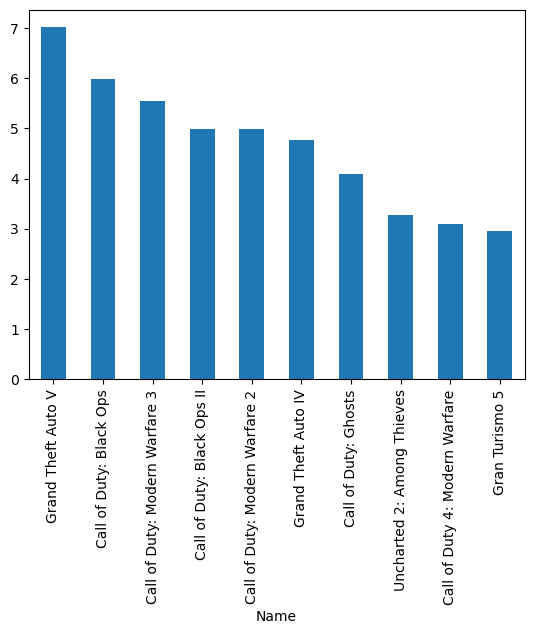

In [72]:
## nlargest and nsmallest

ps3.nlargest(n=10,columns='NA_Sales').loc[:,"NA_Sales"].plot.bar()

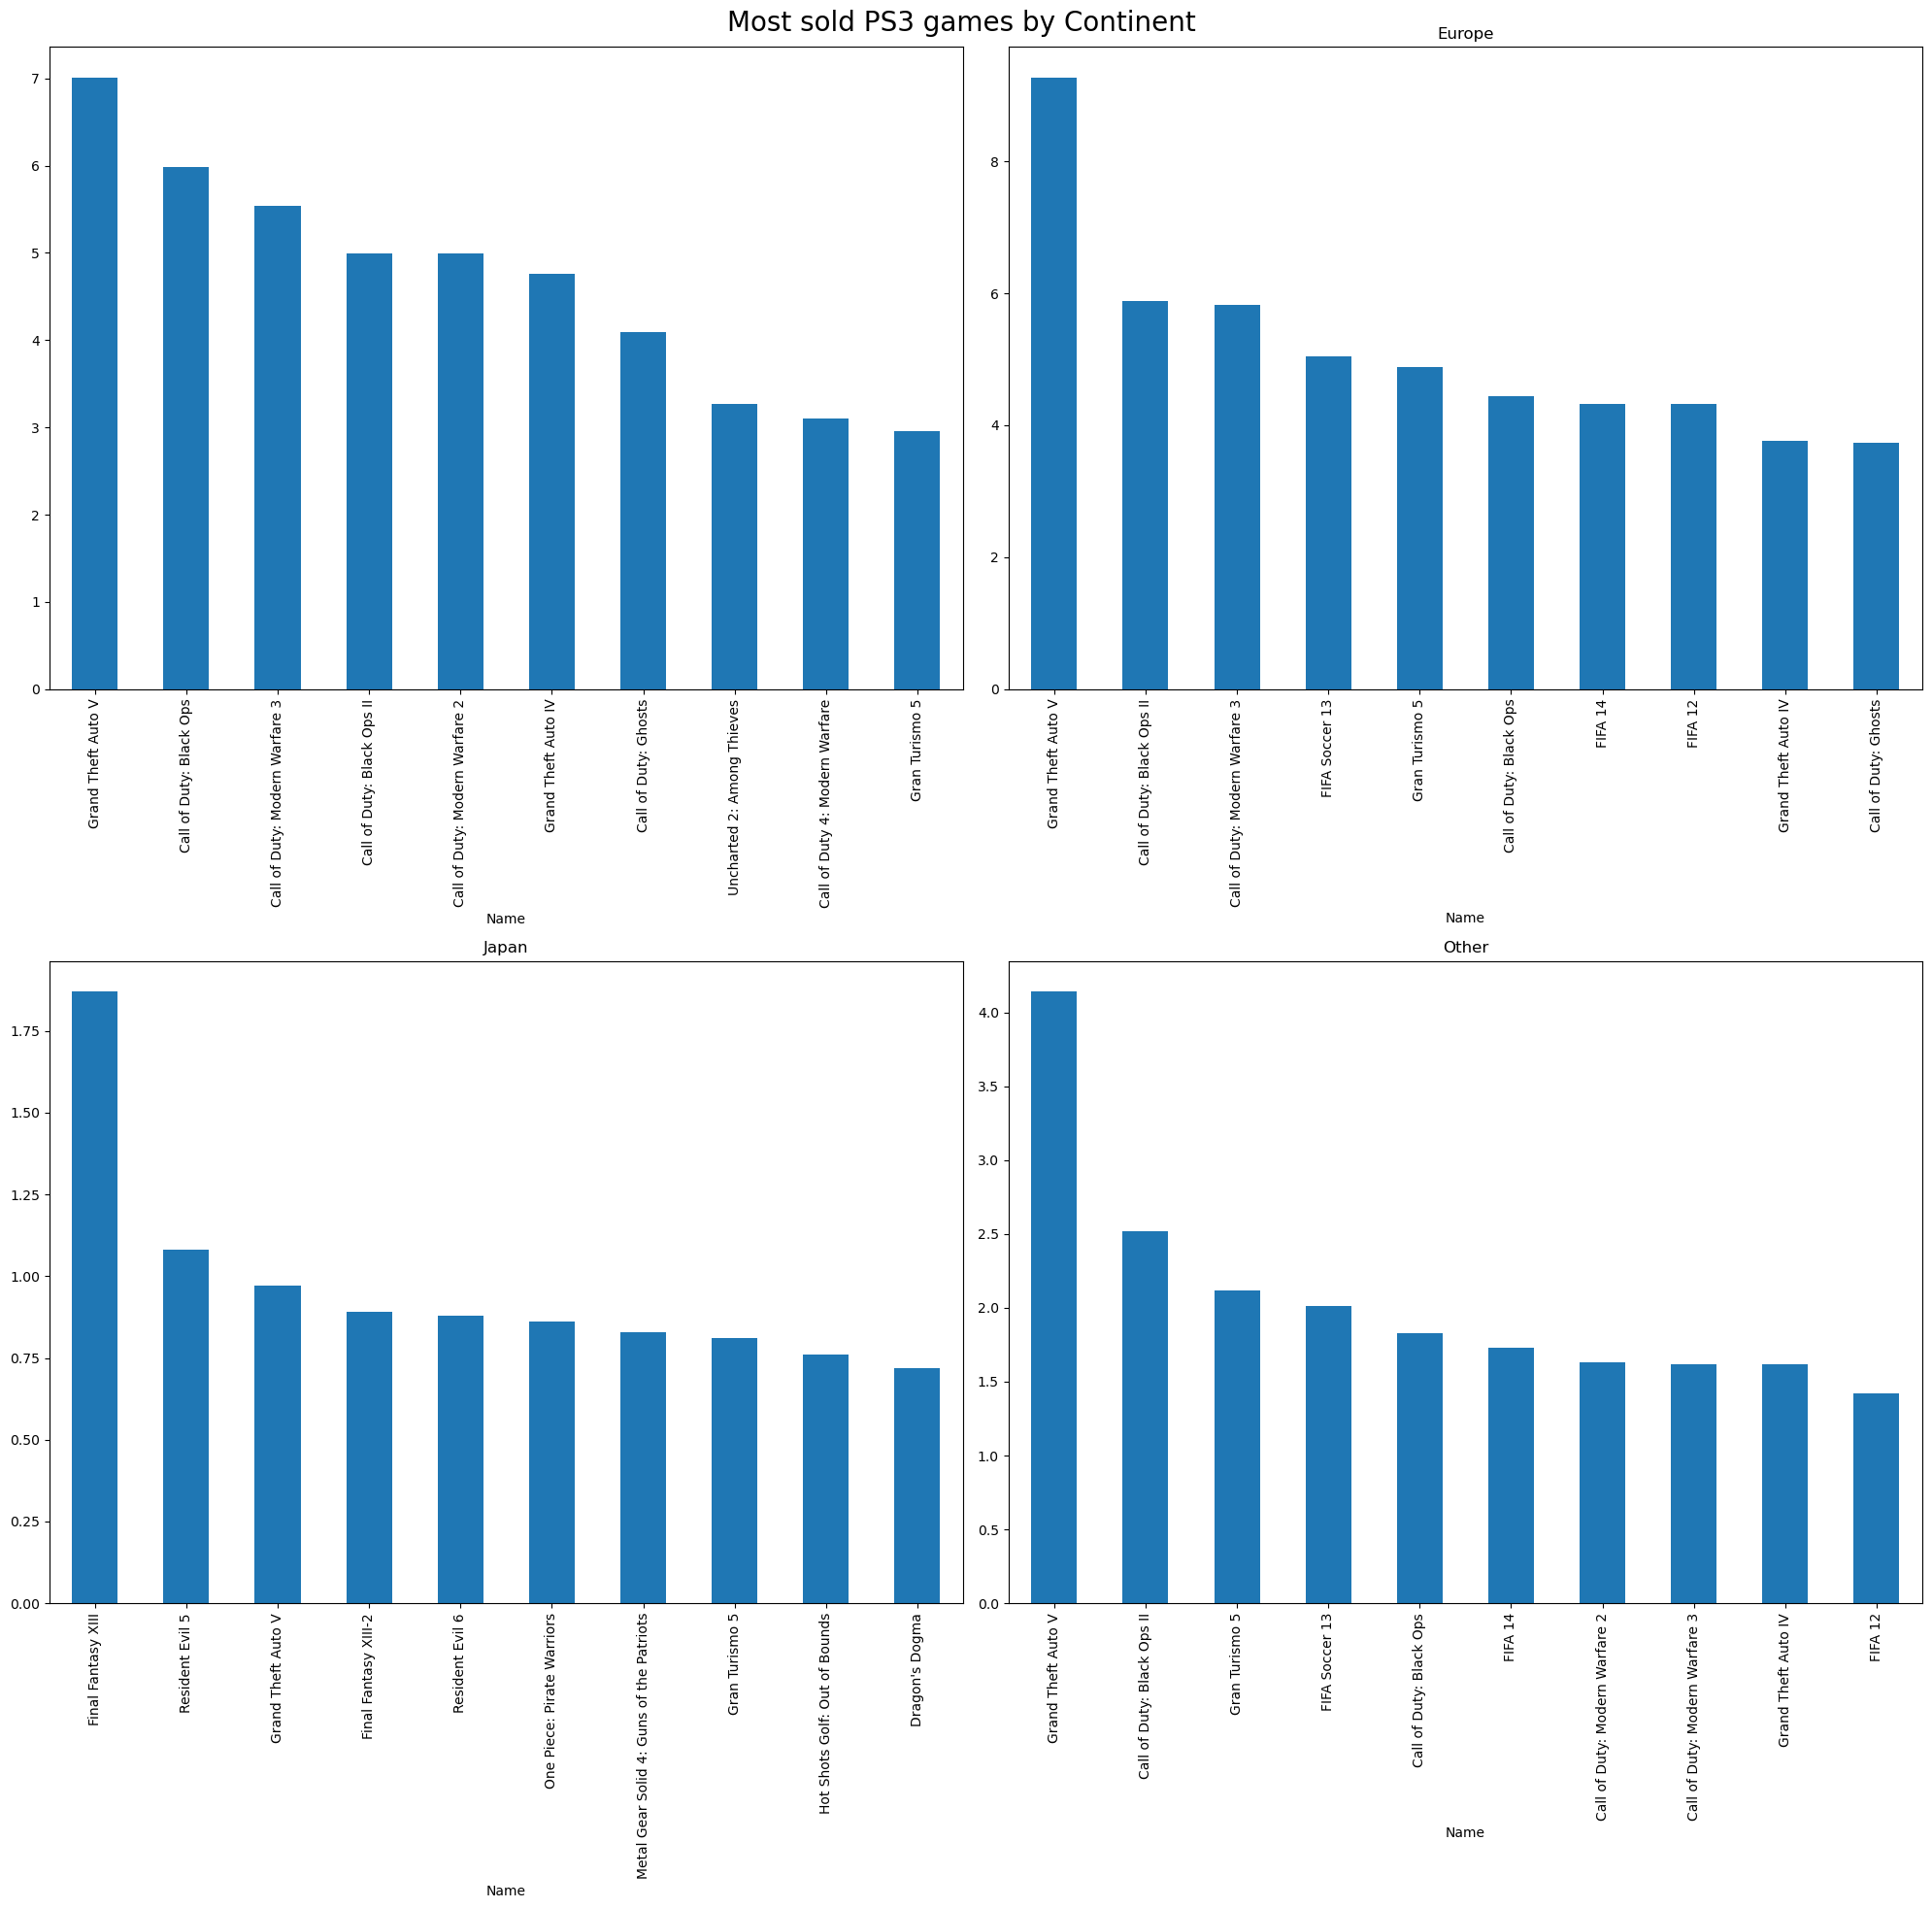

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,2,figsize=(20,20))

ps3.nlargest(n=10,columns='NA_Sales').loc[:,"NA_Sales"].plot.bar(ax=ax[0][0])
ax[1][0].set_title("North America")
ps3.nlargest(n=10,columns='EU_Sales').loc[:,"EU_Sales"].plot.bar(ax=ax[0][1])
ax[0][1].set_title("Europe")
ps3.nlargest(n=10,columns='JP_Sales').loc[:,"JP_Sales"].plot.bar(ax=ax[1][0])
ax[1][0].set_title("Japan")
ps3.nlargest(n=10,columns='Other_Sales').loc[:,"Other_Sales"].plot.bar(ax=ax[1][1])
ax[1][1].set_title("Other")

fig.suptitle("Most sold PS3 games by Continent ", fontsize=20)

fig.tight_layout()

In [74]:
# fig, ax = plt.subplots(2,2,figsize=(20,20))

# ps3.nsmallest(n=5,columns='NA_Sales').loc[:,"NA_Sales"].plot.bar(ax=ax[0][0])
# ax[1][0].set_title("North America")
# ps3.nsmallest(n=5,columns='EU_Sales').loc[:,"EU_Sales"].plot.bar(ax=ax[0][1])
# ax[0][1].set_title("Europe")
# ps3.nsmallest(n=5,columns='JP_Sales').loc[:,"JP_Sales"].plot.bar(ax=ax[1][0])
# ax[1][0].set_title("Japan")
# ps3.nsmallest(n=5,columns='Other_Sales').loc[:,"Other_Sales"].plot.bar(ax=ax[1][1])
# ax[1][1].set_title("Other")

# fig.suptitle("Least sold PS3 games by Continent ", fontsize=20)

# fig.tight_layout()

In [75]:
ps3.nsmallest(n=5,columns='Global Sales')

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
Name,,,,,,,,,
Nobunaga no Yabou Online: Houou no Shou,PS3,2012,Strategy,Ackkstudios,0.00,0.0,0.01,0.0,0.01
Utawarerumono: Futari no Hakuoro,PS3,2016,Misc,Aqua Plus,0.00,0.0,0.01,0.0,0.01
Pro Angler Moves,PS3,2012,Sports,"Interworks Unlimited, Inc.",0.01,0.0,0.00,0.0,0.01
The Legend of Heroes: Trails in the Sky Third Chapter,PS3,2013,Role-Playing,Falcom Corporation,0.00,0.0,0.01,0.0,0.01
Higurashi no Naku Koro ni Iki,PS3,2015,Action,Kaga Create,0.00,0.0,0.01,0.0,0.01


In [76]:
top_100 = ps3.nlargest(n=100,columns="Global Sales")

<AxesSubplot:>

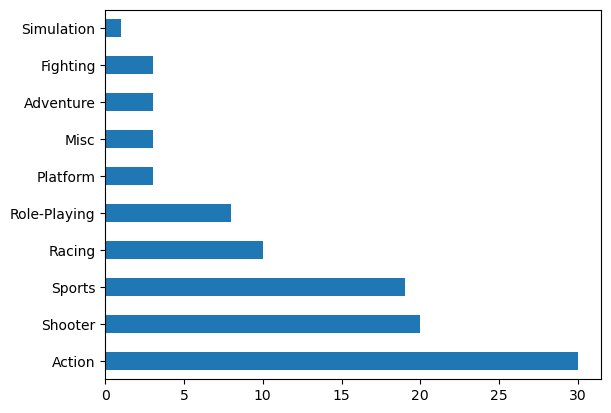

In [77]:
top_100["Genre"].value_counts().plot.barh()

In [78]:
print(df.Year.min())
print(df.Year.max())

1980
2020


In [79]:
df['Global Sales'].quantile(0.99)

5.472000000000007

In [80]:
df.EU_Sales.agg({"min","max","mean","median","std","sum","count"})

count     16291.000000
median        0.020000
std           0.509303
max          29.020000
sum        2406.690000
min           0.000000
mean          0.147731
Name: EU_Sales, dtype: float64

In [81]:
xbox_sales = df.loc[df.Platform == 'XB', ['NA_Sales','Year']].groupby("Year")['NA_Sales'].sum()

In [82]:
xbox_sales

Year
2000     0.74
2001    16.61
2002    34.05
2003    39.34
2004    48.47
2005    34.84
2006     7.47
2007     0.41
2008     0.13
Name: NA_Sales, dtype: float64

In [83]:
xbox_sales.cumsum()

Year
2000      0.74
2001     17.35
2002     51.40
2003     90.74
2004    139.21
2005    174.05
2006    181.52
2007    181.93
2008    182.06
Name: NA_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

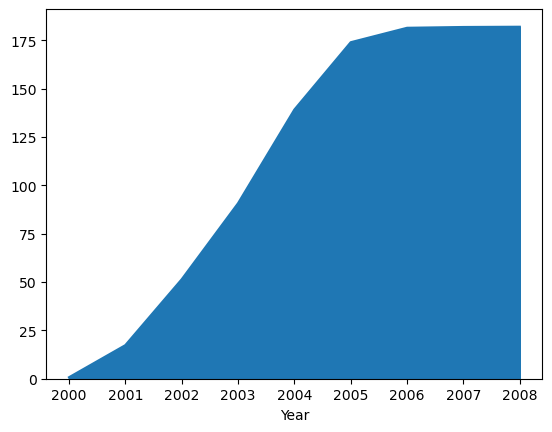

In [84]:
xbox_sales.cumsum().plot.area()

In [85]:
# cut and qcut

In [86]:
# cut gives you same bin size
pd.cut(x=df['Year'],bins=5).value_counts()

(2004.0, 2012.0]     9052
(1996.0, 2004.0]     4185
(2012.0, 2020.0]     2086
(1988.0, 1996.0]      780
(1979.96, 1988.0]     188
Name: Year, dtype: int64

In [87]:
pd.cut(x=df['Year'],bins=[1980,1989,1999,2009,2019],labels=["80s","90s","00s","10s"]).value_counts()

00s    9183
10s    5133
90s    1769
80s     196
Name: Year, dtype: int64

In [88]:
df['Decade'] = pd.cut(x=df['Year'],bins=[1980,1989,1999,2009,2019],labels=["80s","90s","00s","10s"],include_lowest=True)

In [89]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s
...,...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,00s
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,00s
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,00s
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,10s


In [90]:
# qcut quantile cut

pd.qcut(x=df['Global Sales'],q=4,precision=50).value_counts()

(0.01, 0.06]     4266
(0.17, 0.48]     4039
(0.48, 82.74]    4023
(0.06, 0.17]     3963
Name: Global Sales, dtype: int64

In [91]:
sony = ["PS","PS2","PS3","PS4","PSP","PSV"]
nintendo = ["N64","GB","GBA","GC","Wii","Wiiu","DS","NES","3DS","SNES"]
microsoft = ["XB","XB360","XOne"]
pc = ["PC"]
atari = ["2600"]
panasonic = ["3DO"]
sega = ["DC","GG","SAT","SCD"]

In [92]:
def categories(x):
    if x in sony:
        return "Sony"
    elif x in nintendo:
        return "Nintendo"
    elif x in microsoft:
        return "Microsoft"
    elif x in pc:
        return "PC"
    elif x in sega:
        return "Sega"
    else:
        return "Other"

In [93]:
df["Platform"].apply(categories).value_counts()

Sony         6563
Nintendo     5998
Other        1544
Microsoft    1016
PC            938
Sega          232
Name: Platform, dtype: int64

In [94]:
df["Platform_Company"] = df["Platform"].apply(categories)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales,Decade,Platform_Company
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,00s,Nintendo
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,00s,Nintendo
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,00s,Sony
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,10s,Nintendo


In [95]:
import scipy.stats as stats
z_score = df.select_dtypes('float').apply(lambda x: stats.zscore(x))

In [96]:
z_score.mean()

NA_Sales        0.000000e+00
EU_Sales        0.000000e+00
JP_Sales       -5.582805e-17
Other_Sales    -1.395701e-17
Global Sales    5.582805e-17
dtype: float64

In [97]:
z_score.std()

NA_Sales        1.000031
EU_Sales        1.000031
JP_Sales        1.000031
Other_Sales     1.000031
Global Sales    1.000031
dtype: float64

In [98]:
## correlation
corr_matrix = df.drop("Year",axis=1).corr()
corr_matrix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
NA_Sales,1.000000,0.768941,0.451258,0.634540,0.941260
EU_Sales,0.768941,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.451258,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.634540,0.726256,0.290559,1.000000,0.747964
Global Sales,0.941260,0.903264,0.612774,0.747964,1.000000


<AxesSubplot:>

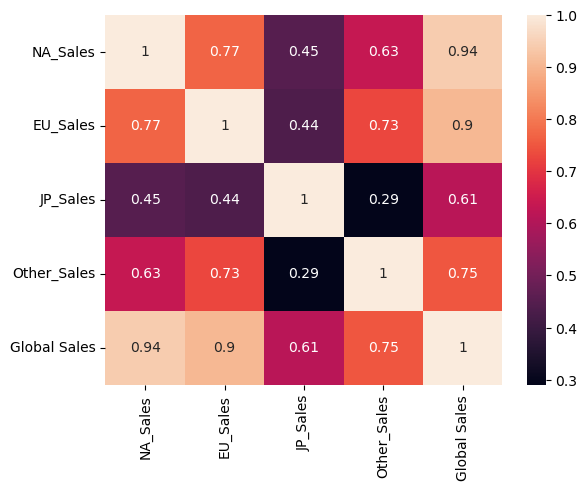

In [99]:
sns.heatmap(corr_matrix,annot=True)

<AxesSubplot:>

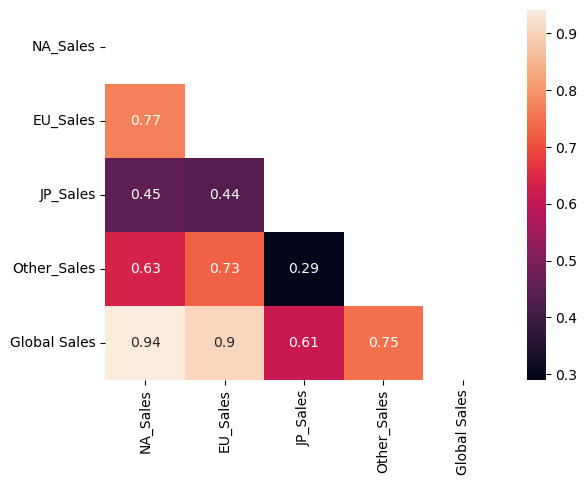

In [100]:
import numpy as np
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix,annot=True,mask=matrix)

## GroupBY

In [101]:
df.groupby("Genre")['NA_Sales'].mean()

Genre
Action          0.265300
Adventure       0.080008
Fighting        0.264043
Misc            0.235421
Platform        0.509703
Puzzle          0.214053
Racing          0.291371
Role-Playing    0.222109
Shooter         0.448643
Simulation      0.214363
Sports          0.290838
Strategy        0.101239
Name: NA_Sales, dtype: float64

In [102]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [103]:
print(df['NA_Sales'].mean())

0.2656908722607575


In [104]:
df.loc[df['Genre'] == 'Shooter','NA_Sales'].mean()

0.44864274570982837

In [105]:
sales_by_genre = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].mean()

In [106]:
sales_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265300,0.158868,0.048800,0.056881
Adventure,0.080008,0.050031,0.040808,0.013108
Fighting,0.264043,0.119617,0.104246,0.043289
Misc,0.235421,0.125605,0.063268,0.043843
Platform,0.509703,0.229314,0.149314,0.058869
Puzzle,0.214053,0.088632,0.099439,0.021877
Racing,0.291371,0.192906,0.046212,0.062596
Role-Playing,0.222109,0.127599,0.238293,0.040395
Shooter,0.448643,0.242161,0.029782,0.079485


<AxesSubplot:ylabel='Genre'>

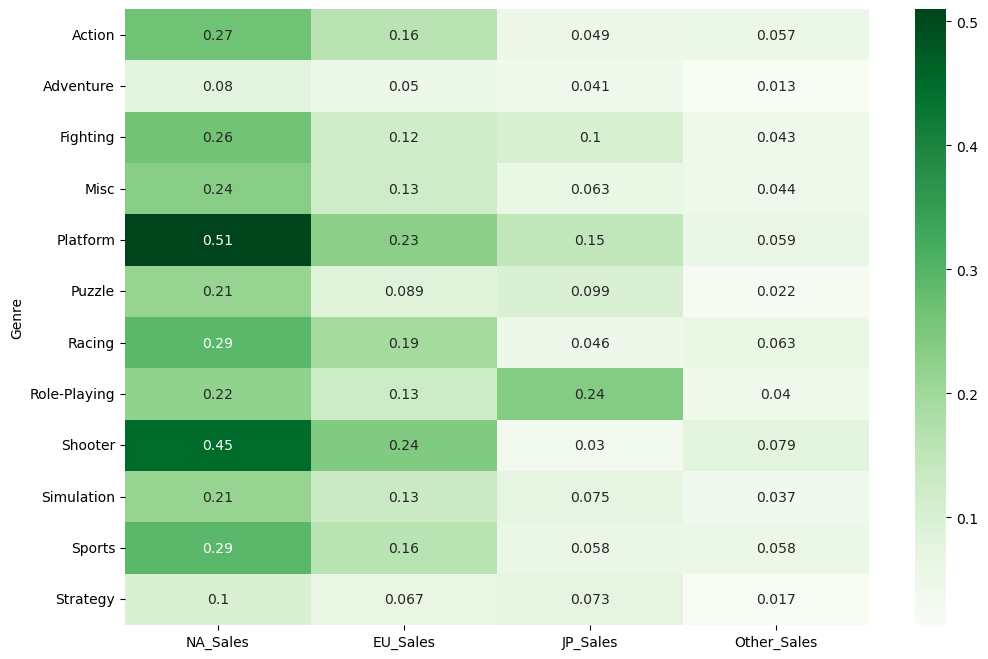

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_by_genre,annot=True,cmap="Greens")

In [108]:
df.groupby('Platform_Company')['JP_Sales'].agg('mean')

Platform_Company
Microsoft    0.001693
Nintendo     0.123805
Other        0.020019
PC           0.000181
Sega         0.178060
Sony         0.071245
Name: JP_Sales, dtype: float64

In [109]:
df.groupby('Platform_Company')['JP_Sales'].agg(['mean',"median","count"])

,mean,median,count
Platform_Company,,,
Microsoft,0.001693,0.00,1016
Nintendo,0.123805,0.00,5998
Other,0.020019,0.00,1544
PC,0.000181,0.00,938
Sega,0.178060,0.12,232
Sony,0.071245,0.00,6563


In [110]:
df.groupby('Platform_Company')[['JP_Sales','Global Sales']].agg({"JP_Sales":['mean',"median","count"],
                                                               "Global Sales":["mean"]})

JP_Sales              Global Sales
                      mean median count         mean
Platform_Company                                    
Microsoft         0.001693   0.00  1016     0.386959
Nintendo          0.123805   0.00  5998     0.567106
Other             0.020019   0.00  1544     0.757474
PC                0.000181   0.00   938     0.271535
Sega              0.178060   0.12   232     0.221853
Sony              0.071245   0.00  6563     0.539633

In [111]:
df.groupby(['Platform_Company','Decade'])[["Global Sales"]].sum()

Global Sales
Platform_Company Decade              
Microsoft        80s             0.00
                 90s             0.00
                 00s           252.09
                 10s           141.06
Nintendo         80s           289.95
                 90s           567.47
                 00s          1935.84
                 10s           607.95
Other            80s            86.57
                 90s            30.55
                 00s           413.61
                 10s           638.81
PC               80s             0.06
                 90s            49.98
                 00s            84.88
                 10s           119.78
Sega             80s             0.00
                 90s            44.06
                 00s             7.41
                 10s             0.00
Sony             80s             0.00
                 90s           586.85
                 00s          1942.25
                 10s          1012.51

In [112]:
platform_sales_per_decade = df.groupby(['Decade','Platform_Company'])[["Global Sales"]].sum().unstack()

<AxesSubplot:xlabel='Decade'>

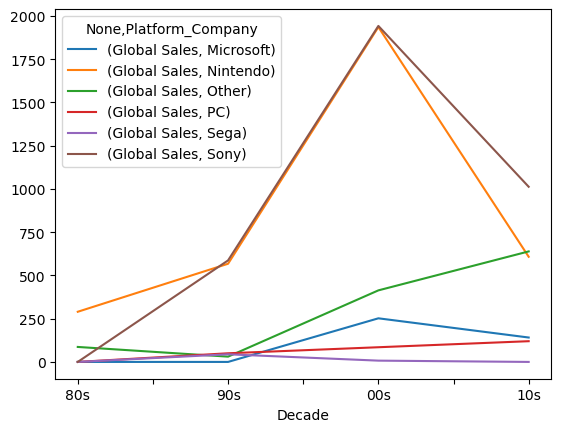

In [113]:
df.groupby(['Decade','Platform_Company'])[["Global Sales"]].sum().unstack(-1).plot.line()

In [114]:
platform_sales_per_decade.columns.get_level_values(1)

Index(['Microsoft', 'Nintendo', 'Other', 'PC', 'Sega', 'Sony'], dtype='object', name='Platform_Company')

In [115]:
platform_sales_per_decade_columns = platform_sales_per_decade.columns.get_level_values(1)

In [116]:
platform_sales_per_decade_columns

Index(['Microsoft', 'Nintendo', 'Other', 'PC', 'Sega', 'Sony'], dtype='object', name='Platform_Company')

<AxesSubplot:xlabel='Decade'>

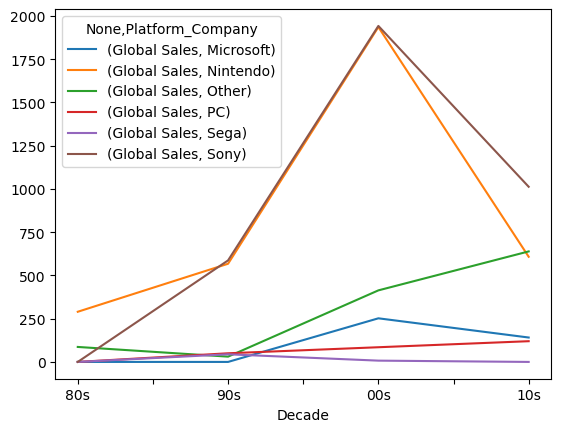

In [117]:
platform_sales_per_decade.plot.line()

- Crosstab: “Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.”

-  Pivot Table: “Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (Hierarchical indexes on the index and columns of the result DataFrame.

### Pivot Table

In [118]:
pd.pivot_table(df.drop('Year',axis=1),index='Platform_Company',aggfunc='mean')

,EU_Sales,Global Sales,JP_Sales,NA_Sales,Other_Sales
Platform_Company,,,,,
Microsoft,0.103642,0.386959,0.001693,0.261073,0.020079
Nintendo,0.126080,0.567106,0.123805,0.285885,0.030957
Other,0.202468,0.757474,0.020019,0.474547,0.060136
PC,0.146429,0.271535,0.000181,0.098124,0.025938
Sega,0.011164,0.221853,0.178060,0.030819,0.001681
Sony,0.166480,0.539633,0.071245,0.231067,0.070891


In [119]:
##  create multiple indexes and spcify its value and aggfunc
pd.pivot_table(df,index=['Platform_Company','Decade'],aggfunc='mean')

EU_Sales  Global Sales  JP_Sales  NA_Sales  \
Platform_Company Decade                                               
Microsoft        00s     0.074284      0.313935  0.001719  0.226725   
                 10s     0.214319      0.662254  0.001596  0.390563   
Nintendo         80s     0.302184      3.332759  1.178046  1.780230   
                 90s     0.160705      1.000829  0.370988  0.447690   
                 00s     0.123982      0.498928  0.073915  0.267691   
                 10s     0.107840      0.415550  0.097710  0.182577   
Other            80s     0.041897      0.746293  0.000000  0.696379   
                 90s     0.117447      0.650000  0.103404  0.410000   
                 00s     0.191670      0.742567  0.014004  0.469318   
                 10s     0.237221      0.775255  0.022148  0.450534   
PC               80s     0.025000      0.030000  0.000000  0.000000   
                 90s     0.499474      1.315263  0.002368  0.772895   
                 00s     0.118643      0.192036  0.000181  0.055882   
                 10s     0.144474      0.262675  0.000000  0.083268   
Sega             90s     0.008955      0.219204  0.185821  0.022985   
                 00s     0.025484      0.239032  0.127742  0.081613   
Sony             90s     0.180622      0.640666  0.130655  0.293679   
                 00s     0.159478      0.559726  0.060715  0.257810   
                 10s     0.171690      0.465094  0.063032  0.162095   

                         Other_Sales         Year  
Platform_Company Decade                            
Microsoft        00s        0.010560  2003.636364  
                 10s        0.055962  2014.788732  
Nintendo         80s        0.072069  1986.264368  
                 90s        0.021182  1995.719577  
                 00s        0.032843  2005.986598  
                 10s        0.027307  2011.397813  
Other            80s        0.007241  1982.137931  
                 90s        0.018936  1993.914894  
                 00s        0.067522  2007.605027  
                 10s        0.064939  2012.015777  
PC               80s        0.010000  1986.500000  
                 90s        0.040000  1996.236842  
                 00s        0.016109  2006.341629  
                 10s        0.034364  2012.252193  
Sega             90s        0.001294  1996.218905  
                 00s        0.004194  2000.806452  
Sony             90s        0.035742  1997.256550  
                 00s        0.081804  2005.091354  
                 10s        0.068287  2012.661461

### Crosstab

In [120]:
pd.crosstab(index=df['Platform_Company'],columns=df['Decade'])

Decade,80s,90s,00s,10s
Platform_Company,,,,
Microsoft,0,0,803,213
Nintendo,87,567,3880,1463
Other,116,47,557,824
PC,2,38,442,456
Sega,0,201,31,0
Sony,0,916,3470,2177


In [121]:
# multiple indexes and a column
pd.crosstab(index=[df['Platform_Company'],df['Publisher']],columns=df['Decade'])

Decade                                  80s  90s  00s  10s
Platform_Company Publisher                                
Microsoft        3DO                      0    0    1    0
                 505 Games                0    0    1    6
                 5pb                      0    0    0    1
                 Acclaim Entertainment    0    0   21    0
                 Activision               0    0   60   20
...                                     ...  ...  ...  ...
Sony             Zushi Games              0    0    1    0
                 bitComposer Games        0    0    0    1
                 dramatic create          0    0    0    5
                 fonfun                   0    0    1    0
                 responDESIGN             0    0    1    0

[1070 rows x 4 columns]

In [122]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales', 'Decade',
       'Platform_Company'],
      dtype='object')

In [123]:
# single index and multple columns
pd.crosstab(index=df['Platform_Company'],columns=[df['Genre'],df['Publisher']],margins=True)

Genre                                  Action                                \
Publisher        20th Century Fox Video Games 3DO 505 Games 5pb 989 Studios   
Platform_Company                                                              
Microsoft                                   0   0         1   0           0   
Nintendo                                    0   4         8   0           0   
Other                                       4   0         4   0           0   
PC                                          0   0         0   0           0   
Sega                                        0   0         0   0           0   
Sony                                        0  13         8   5           2   
All                                         4  17        21   5           2   

Genre                                                                          \
Publisher        ASC Games Abylight Acclaim Entertainment Ackkstudios Acquire   
Platform_Company                                                                
Microsoft                0        0                     2           0       0   
Nintendo                 0        0                     1           2       0   
Other                    0        0                     0           0       0   
PC                       0        0                     0           0       0   
Sega                     0        0                     0           0       0   
Sony                     1        1                    11           2       2   
All                      1        1                    14           4       2   

Genre             ...     Strategy                                     \
Publisher         ... Trion Worlds Ubisoft Unknown Virgin Interactive   
Platform_Company  ...                                                   
Microsoft         ...            0       0       0                  0   
Nintendo          ...            0      12       1                  0   
Other             ...            0       2       0                  0   
PC                ...            1      10       5                  2   
Sega              ...            0       0       0                  0   
Sony              ...            0       5       0                  4   
All               ...            1      29       6                  6   

Genre                                                                  \
Publisher        Vivendi Games Warner Bros. Interactive Entertainment   
Platform_Company                                                        
Microsoft                    0                                      0   
Nintendo                     0                                      2   
Other                        0                                      0   
PC                          11                                      0   
Sega                         0                                      0   
Sony                         1                                      0   
All                         12                                      2   

Genre                                                                   All  
Publisher        Westwood Studios Zoo Digital Publishing Zushi Games         
Platform_Company                                                             
Microsoft                       0                      0           0   1016  
Nintendo                        0                      1           2   5998  
Other                           0                      0           0   1544  
PC                              1                      0           0    938  
Sega                            0                      0           0    232  
Sony                            0                      0           0   6563  
All                             1                      1           2  16291  

[7 rows x 1824 columns]

### Pivot Table or CrossTab?

Choose how you want to represent the data. At bare minimum, the pivot table compares the index and yields numerical values. Additionally, the crosstab compares the index and columns which yield the count.

## Join, Merge and Concat

#### Split dataframe where we have Publisher is Activision

In [124]:
activision_df = df.loc[df['Publisher']=='Activision'].copy()
ea_df = df.loc[df['Publisher']=='Electronic Arts'].copy()

In [125]:
pd.merge(ea_df,activision_df,how='inner',on='Platform')

,Name_x,Platform,Year_x,Genre_x,Publisher_x,NA_Sales_x,EU_Sales_x,JP_Sales_x,Other_Sales_x,Global Sales_x,...,Year_y,Genre_y,Publisher_y,NA_Sales_y,EU_Sales_y,JP_Sales_y,Other_Sales_y,Global Sales_y,Decade_y,Platform_Company_y
0,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,...,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,10s,Sony
1,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,...,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.60,10s,Sony
2,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,...,2014,Shooter,Activision,2.49,2.05,0.16,0.96,5.65,10s,Sony
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,...,2013,Shooter,Activision,1.78,1.42,0.05,0.38,3.63,10s,Sony
4,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,...,2015,Shooter,Activision,0.77,0.78,0.04,0.31,1.91,10s,Sony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104429,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.00,0.02,0.24,...,2013,Action,Activision,0.05,0.03,0.00,0.01,0.09,10s,Other
104430,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.00,0.02,0.24,...,2014,Action,Activision,0.05,0.01,0.00,0.01,0.07,10s,Other
104431,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.00,0.02,0.24,...,2014,Action,Activision,0.03,0.02,0.00,0.00,0.06,10s,Other
104432,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.00,0.02,0.24,...,2013,Shooter,Activision,0.00,0.04,0.00,0.00,0.05,10s,Other


In [126]:
pd.concat([ea_df,activision_df],axis=0,ignore_index=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales,Decade,Platform_Company
0,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,10s,Sony
1,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24,10s,Sony
2,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11,00s,PC
3,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,10s,Sony
4,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34,10s,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
2300,Teenage Mutant Ninja Turtles (3DS),3DS,2013,Action,Activision,0.01,0.00,0.00,0.00,0.01,10s,Nintendo
2301,Madagascar: Escape 2 Africa,PC,2008,Action,Activision,0.01,0.00,0.00,0.00,0.01,00s,PC
2302,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010,Shooter,Activision,0.01,0.00,0.00,0.00,0.01,10s,PC
2303,Transformers: Fall of Cybertron,PC,2012,Action,Activision,0.01,0.00,0.00,0.00,0.01,10s,PC


### Apply, Applymap and map

In [127]:
nyc = pd.read_csv('https://raw.githubusercontent.com/misraturp/Pandas-apply-vs.-map-vs.-applymap/main/NYC_Jobs.csv')
nyc.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,424339,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Triage Nurse, Bureau of Public Health Clinics",PUBLIC HEALTH NURSE,Competitive-1,51011,03,Health,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please ...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2022,NaN,04/05/2022,04/12/2022
1,379094,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,02,"Technology, Data & Innovation",...,NaN,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",NaN,NaN,NaN,New York City Residency is not required for th...,01/07/2019,NaN,01/07/2019,04/12/2022
2,520417,NYC HOUSING AUTHORITY,External,1,Chief of Settlement,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Legal Affairs,...,1. Resume and cover letter must also include ...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,03/28/2022,NaN,03/28/2022,04/12/2022
3,233549,NYC EMPLOYEES RETIREMENT SYS,External,1,"CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4",CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,04,Information Technology & Telecommunications,...,NaN,Click the 'apply now' button to apply. Please...,NaN,NaN,NaN,New York City Residency is not required for th...,03/01/2016,NaN,03/01/2016,04/12/2022
4,510256,HUMAN RIGHTS COMMISSION,External,5,Associate Human Rights Specialist,ASSOCIATE HUMAN RIGHTS SPECIAL,Competitive-1,55038,01,Constituent Services & Community Programs,...,NaN,For City employees: Go to Employee Self-Servic...,": DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...","22 Reade St, Ny",NaN,New York City residency is generally required ...,12/16/2021,NaN,12/16/2021,04/12/2022


In [128]:
nyc = nyc[['Job ID','Civil Service Title','Agency','Posting Type','Job Category','Salary Range From','Salary Range To']]
nyc.head()

,Job ID,Civil Service Title,Agency,Posting Type,Job Category,Salary Range From,Salary Range To
0,424339,PUBLIC HEALTH NURSE,DEPT OF HEALTH/MENTAL HYGIENE,External,Health,84252.0,84252.0
1,379094,CERT IT DEVELOPER (APP),NYC EMPLOYEES RETIREMENT SYS,External,"Technology, Data & Innovation",82884.0,116391.0
2,520417,EXECUTIVE AGENCY COUNSEL,NYC HOUSING AUTHORITY,External,Legal Affairs,105000.0,125000.0
3,233549,CERTIFIED IT ADMINISTRATOR (LA,NYC EMPLOYEES RETIREMENT SYS,External,Information Technology & Telecommunications,87203.0,131623.0
4,510256,ASSOCIATE HUMAN RIGHTS SPECIAL,HUMAN RIGHTS COMMISSION,External,Constituent Services & Community Programs,58449.0,67216.0


In [139]:
## Capitalize the text

### Apply is good for applying a function to either axis or the 
### whole dataframe to the function

capitalize = lambda x: x.upper()

df['Publisher'].apply(capitalize)

0          NINTENDO
1          NINTENDO
2          NINTENDO
3          NINTENDO
4          NINTENDO
            ...    
16286         KEMCO
16287    INFOGRAMES
16288    ACTIVISION
16289      7G//AMES
16290       WANADOO
Name: Publisher, Length: 16291, dtype: object

In [140]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales,Decade,Platform_Company
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,00s,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80s,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,00s,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,00s,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90s,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,00s,Nintendo
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,00s,Nintendo
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,00s,Sony
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,10s,Nintendo


In [144]:
## difference between apply and applymap is that apply passes the dataframe to the function
## one axis at a time
## applymap passes one element at a time

def add_year(text):
    return str(text) + '_2022'
nyc.applymap(add_year)

,Job ID,Civil Service Title,Agency,Posting Type,Job Category,Salary Range From,Salary Range To
0,424339_2022,PUBLIC HEALTH NURSE_2022,DEPT OF HEALTH/MENTAL HYGIENE_2022,External_2022,Health_2022,84252.0_2022,84252.0_2022
1,379094_2022,CERT IT DEVELOPER (APP)_2022,NYC EMPLOYEES RETIREMENT SYS_2022,External_2022,"Technology, Data & Innovation_2022",82884.0_2022,116391.0_2022
2,520417_2022,EXECUTIVE AGENCY COUNSEL_2022,NYC HOUSING AUTHORITY_2022,External_2022,Legal Affairs_2022,105000.0_2022,125000.0_2022
3,233549_2022,CERTIFIED IT ADMINISTRATOR (LA_2022,NYC EMPLOYEES RETIREMENT SYS_2022,External_2022,Information Technology & Telecommunications_2022,87203.0_2022,131623.0_2022
4,510256_2022,ASSOCIATE HUMAN RIGHTS SPECIAL_2022,HUMAN RIGHTS COMMISSION_2022,External_2022,Constituent Services & Community Programs_2022,58449.0_2022,67216.0_2022
...,...,...,...,...,...,...,...
3768,457839_2022,CERTIFIED IT ADMINISTRATOR (LA_2022,NYC EMPLOYEES RETIREMENT SYS_2022,Internal_2022,"Technology, Data & Innovation_2022",85371.0_2022,119883.0_2022
3769,527141_2022,ASSOCIATE HOUSING DEVELOPMENT_2022,HOUSING PRESERVATION & DVLPMNT_2022,Internal_2022,"Engineering, Architecture, & Planning_2022",74650.0_2022,85847.0_2022
3770,509443_2022,SENIOR IT ARCHITECT_2022,FINANCIAL INFO SVCS AGENCY_2022,Internal_2022,"Technology, Data & Innovation_2022",100000.0_2022,115000.0_2022
3771,352367_2022,ECONOMIST_2022,DEPT OF HEALTH/MENTAL HYGIENE_2022,Internal_2022,"Finance, Accounting, & Procurement_2022",42288.0_2022,59400.0_2022


In [145]:
## map works on series and its main strength is to replace values
## so given a series like that

s = pd.Series(['cat','dog','NaN','horse'])
s

0      cat
1      dog
2      NaN
3    horse
dtype: object

In [146]:
# we can change the values using a dict only
s.map({'cat':'kitten','dog':'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [147]:
# but you can also still pass a function to it
# this, however, can be done using apply too, so nothing special
# thus, map is mainly useful for when you want to completely map elements from
# one value to another

def change_word(title):
    title = title.replace('DEPT','kitten')
    return title

nyc['Agency'].map(change_word)

nyc['Agency'].map('The position is created by {}'.format)

0       The position is created by DEPT OF HEALTH/MENT...
1       The position is created by NYC EMPLOYEES RETIR...
2        The position is created by NYC HOUSING AUTHORITY
3       The position is created by NYC EMPLOYEES RETIR...
4       The position is created by HUMAN RIGHTS COMMIS...
                              ...                        
3768    The position is created by NYC EMPLOYEES RETIR...
3769    The position is created by HOUSING PRESERVATIO...
3770    The position is created by FINANCIAL INFO SVCS...
3771    The position is created by DEPT OF HEALTH/MENT...
3772    The position is created by HUMAN RIGHTS COMMIS...
Name: Agency, Length: 3773, dtype: object

In [148]:
# for both map and applymap, you can specify na_action to ignore,
# so that NA values will not even be passed to the function
# the result does not change

s.map({'cat':'kitten','dog':'puppy'},na_action='')

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object